# Data Analysis of Bharti Infratel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

#### Reading Data from CSV file

In [2]:
data=pd.read_csv("INFRATEL.csv")

In [3]:
#Checking rows and columns of datframe
data.shape

(494, 15)

The dataframe has 494 examples with each having 15 features

In [4]:
print(data.columns)

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')


In [5]:
data.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFRATEL,EQ,15-May-2017,374.70,375.80,375.80,368.65,372.00,371.05,371.08,761032,2.824044e+08,27740,357531,46.98
1,INFRATEL,EQ,16-May-2017,371.05,371.15,380.85,370.05,375.75,376.55,377.05,1346372,5.076459e+08,42924,677288,50.30
2,INFRATEL,EQ,17-May-2017,376.55,377.60,396.50,375.10,388.95,389.90,383.22,2268036,8.691629e+08,83975,1371275,60.46
3,INFRATEL,EQ,18-May-2017,389.90,388.40,388.85,377.00,378.55,378.90,382.60,2014628,7.707910e+08,50270,1025637,50.91
4,INFRATEL,EQ,19-May-2017,378.90,381.10,387.50,374.85,379.40,378.95,379.43,2031322,7.707525e+08,63099,1020560,50.24
5,INFRATEL,EQ,22-May-2017,378.95,383.70,389.30,376.15,388.20,387.95,385.56,2772691,1.069052e+09,73071,1228540,44.31
6,INFRATEL,EQ,23-May-2017,387.95,385.00,390.00,378.40,379.90,379.85,382.84,3811223,1.459071e+09,60957,2039492,53.51
7,INFRATEL,EQ,24-May-2017,379.85,379.85,382.00,367.20,368.45,369.00,372.49,3134390,1.167521e+09,83856,1860115,59.35
8,INFRATEL,EQ,25-May-2017,369.00,369.10,376.35,365.85,368.70,373.50,371.80,7287977,2.709680e+09,89929,6053646,83.06
9,INFRATEL,EQ,26-May-2017,373.50,370.00,377.20,366.30,369.50,369.95,371.45,1918463,7.126107e+08,43541,788763,41.11


In [6]:
print(data['Symbol'].value_counts())
print(data['Series'].value_counts())

INFRATEL    494
Name: Symbol, dtype: int64
EQ    494
Name: Series, dtype: int64


#### Dropping Duplicate Dates

In [7]:
data=data.drop_duplicates(subset=['Date'], keep=False)

In [8]:
print(data.shape)

(494, 15)


##### The dataset has no duplicate dates values as rows are same after dropping duplicates.

##### The rows are sorted wrt 'Date'. So we have a time series data.

In [9]:
data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,330.520749,330.719737,335.645850,325.393623,330.235931,330.299595,330.468158,3.482303e+06,1.177754e+09,57056.591093,2.008089e+06,54.615445
std,51.927489,52.211922,52.848153,51.302441,51.875968,51.971576,52.016754,6.468444e+06,2.533240e+09,31831.065955,4.331648e+06,16.299577
min,249.200000,242.650000,251.700000,242.250000,249.500000,249.200000,249.480000,9.425700e+04,2.497926e+07,1001.000000,3.785800e+04,7.730000
25%,286.862500,287.000000,291.487500,283.450000,286.087500,286.737500,286.465000,1.662104e+06,5.491422e+08,34297.000000,8.341755e+05,43.787500
50%,321.350000,320.900000,324.925000,315.050000,320.500000,320.850000,320.855000,2.481613e+06,8.109989e+08,51504.000000,1.330784e+06,55.235000
75%,375.075000,376.250000,381.262500,371.000000,375.437500,375.075000,376.262500,3.800934e+06,1.276214e+09,70515.750000,2.124545e+06,65.532500
max,479.200000,476.700000,482.800000,467.000000,479.450000,479.200000,476.000000,1.313354e+08,5.259161e+10,197541.000000,8.788042e+07,94.720000


###### Description is not telling a lot about data:

- open price and close price mean and std are almost same. So, there is no reasonable information coming from here.

### Plots of Distribution of features

#### Prev Close

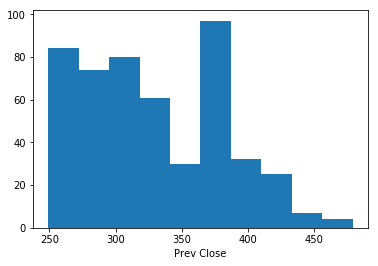

In [10]:
plt.hist(data['Prev Close'])
plt.xlabel("Prev Close")
plt.show()

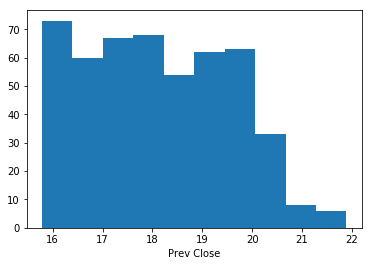

In [11]:
plt.hist(np.sqrt(data['Prev Close']))
plt.xlabel("Prev Close")
plt.show()

##### Square root feature transform is making the feature more uniform. So we can use this transformation while making model.

#### Open Price

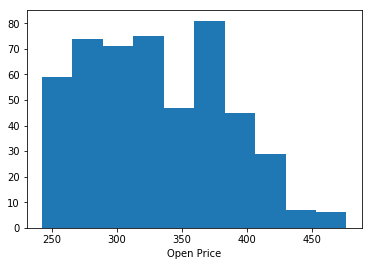

In [12]:
plt.hist(data['Open Price'])
plt.xlabel("Open Price")
plt.show()

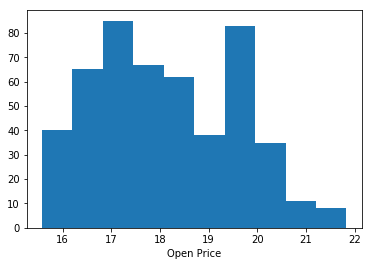

In [13]:
plt.hist(np.sqrt(data['Open Price']))
plt.xlabel("Open Price")
plt.show()

##### No such feature transform is making the feature uniform.

#### High Price

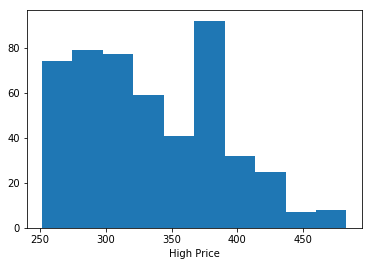

In [14]:
plt.hist((data['High Price']))
plt.xlabel("High Price")
plt.show()

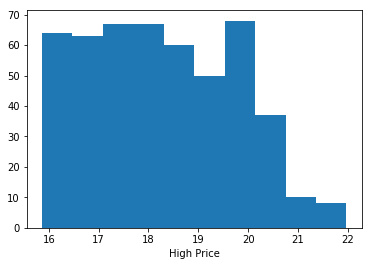

In [15]:
plt.hist(np.sqrt(data['High Price']))
plt.xlabel("High Price")
plt.show()

##### Square root feature transform is making the feature more uniform. So we can use this transformation while making model.

#### Low Price

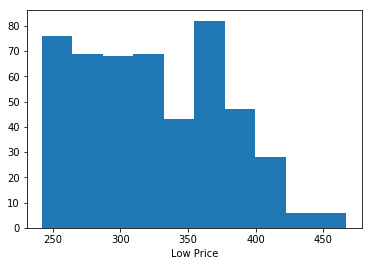

In [16]:
plt.hist((data['Low Price']))
plt.xlabel("Low Price")
plt.show()

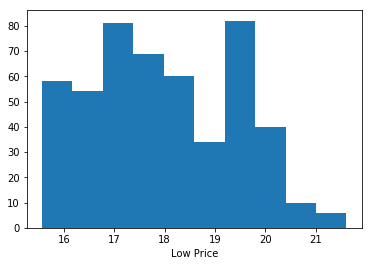

In [17]:
plt.hist(np.sqrt(data['Low Price']))
plt.xlabel("Low Price")
plt.show()

##### No such feature transform is making the feature uniform.

#### Last Price

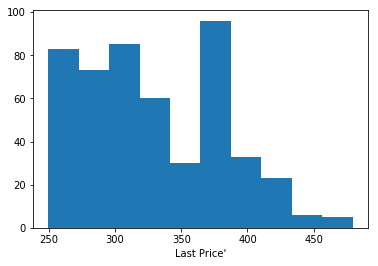

In [18]:
plt.hist((data['Last Price']))
plt.xlabel("Last Price'")
plt.show()

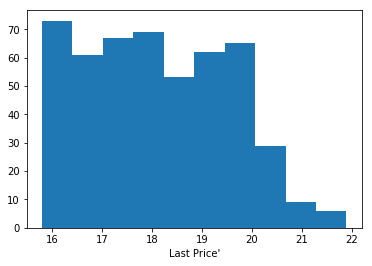

In [19]:
plt.hist(np.sqrt(data['Last Price']))
plt.xlabel("Last Price'")
plt.show()

##### Square root feature transform is making the feature more uniform. So we can use this transformation while making model.

#### Close Price

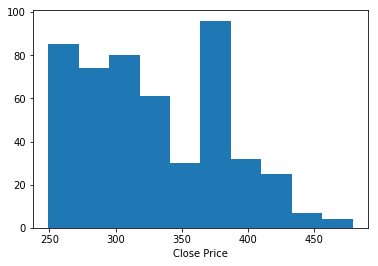

In [20]:
plt.hist((data['Close Price']))
plt.xlabel("Close Price")
plt.show()

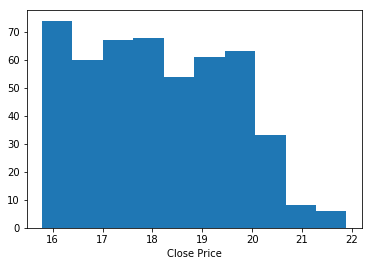

In [21]:
plt.hist(np.sqrt(data['Close Price']))
plt.xlabel("Close Price")
plt.show()

##### Square root feature transform is making the feature more uniform. So we can use this transformation while making model.

#### Average Price

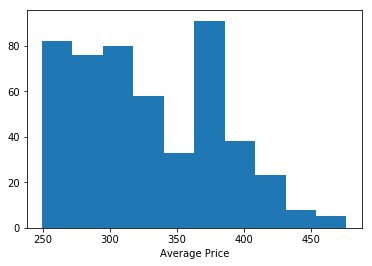

In [22]:
plt.hist((data['Average Price']))
plt.xlabel("Average Price")
plt.show()

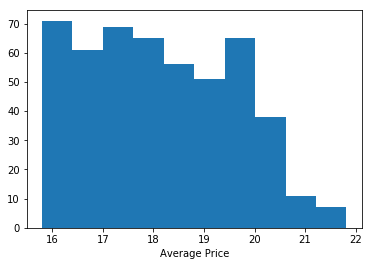

In [23]:
plt.hist(np.sqrt(data['Average Price']))
plt.xlabel("Average Price")
plt.show()

##### Square root feature transform is making the feature more uniform. So we can use this transformation while making model.

##### All price  features have similar distribution as it was visible from the description table where all the qauntiles and mean and std of price features have almost similar values. But that may be the case where share prices are not fluctuating much for the company. We may use the following feature transformations done above while making models.

#### Total Traded Quantity

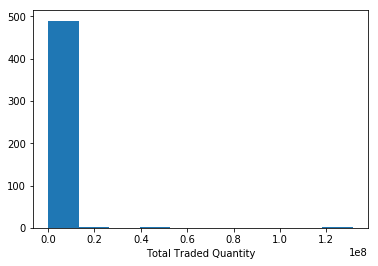

In [24]:
plt.hist(data['Total Traded Quantity'])
plt.xlabel("Total Traded Quantity")
plt.show()

##### This feature has a very very right skewed distribution. So,we try to apply log operation on the feature.

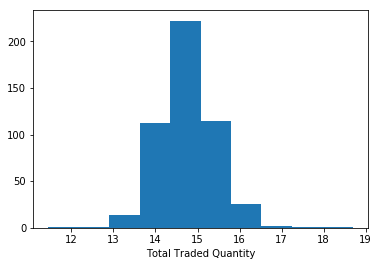

In [25]:
plt.hist(np.log(data['Total Traded Quantity']))
plt.xlabel("Total Traded Quantity")
plt.show()

##### This feature now has almost Gaussian Distribution.

#### Turnover

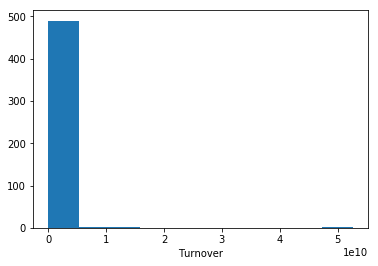

In [26]:
plt.hist(data['Turnover'])
plt.xlabel("Turnover")
plt.show()

##### This feature has a very very right skewed distribution. So,we try to apply log operation on the feature.

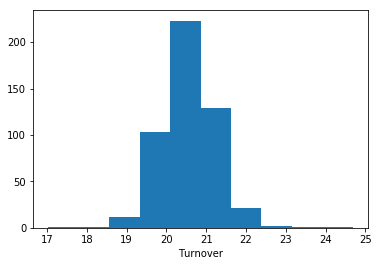

In [27]:
plt.hist(np.log(data['Turnover']))
plt.xlabel("Turnover")
plt.show()

##### This feature now has almost Gaussian Distribution.

#### Deliverable Quantity

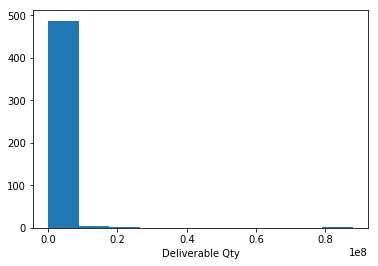

In [28]:
plt.hist(data['Deliverable Qty'])
plt.xlabel("Deliverable Qty")
plt.show()

##### This feature has a very very right skewed distribution. So,we try to apply log operation on the feature.

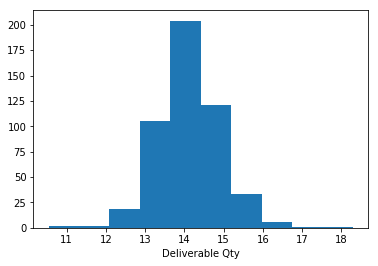

In [29]:
plt.hist(np.log(data['Deliverable Qty']))
plt.xlabel("Deliverable Qty")
plt.show()

##### This feature now has almost Gaussian Distribution.

##### These features are right skewed. So we can apply log operations on them while making models.

#### No. of Trades

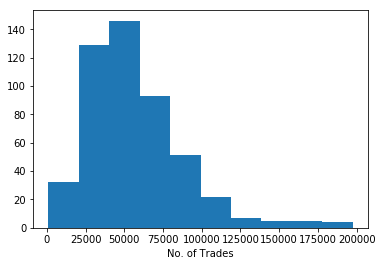

In [30]:
plt.hist(data['No. of Trades'])
plt.xlabel("No. of Trades")
plt.show()

##### This feature is little right skewed. So we apply sqrt operation on it.

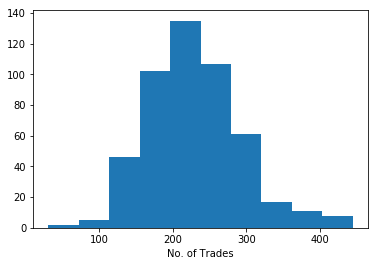

In [31]:
plt.hist(np.sqrt(data['No. of Trades']))
plt.xlabel("No. of Trades")
plt.show()

##### This feature has become almost Gaussian Distribution. So we can also use this feature transform on it.

#### % Dly Qt to Traded Qty

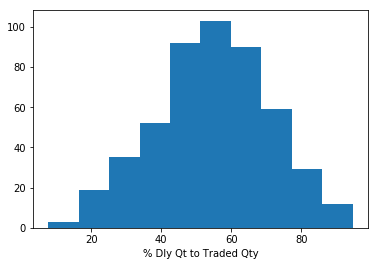

In [32]:
plt.hist((data['% Dly Qt to Traded Qty']))
plt.xlabel("% Dly Qt to Traded Qty")
plt.show()

##### This feature has a almost Gaussian Distribution.

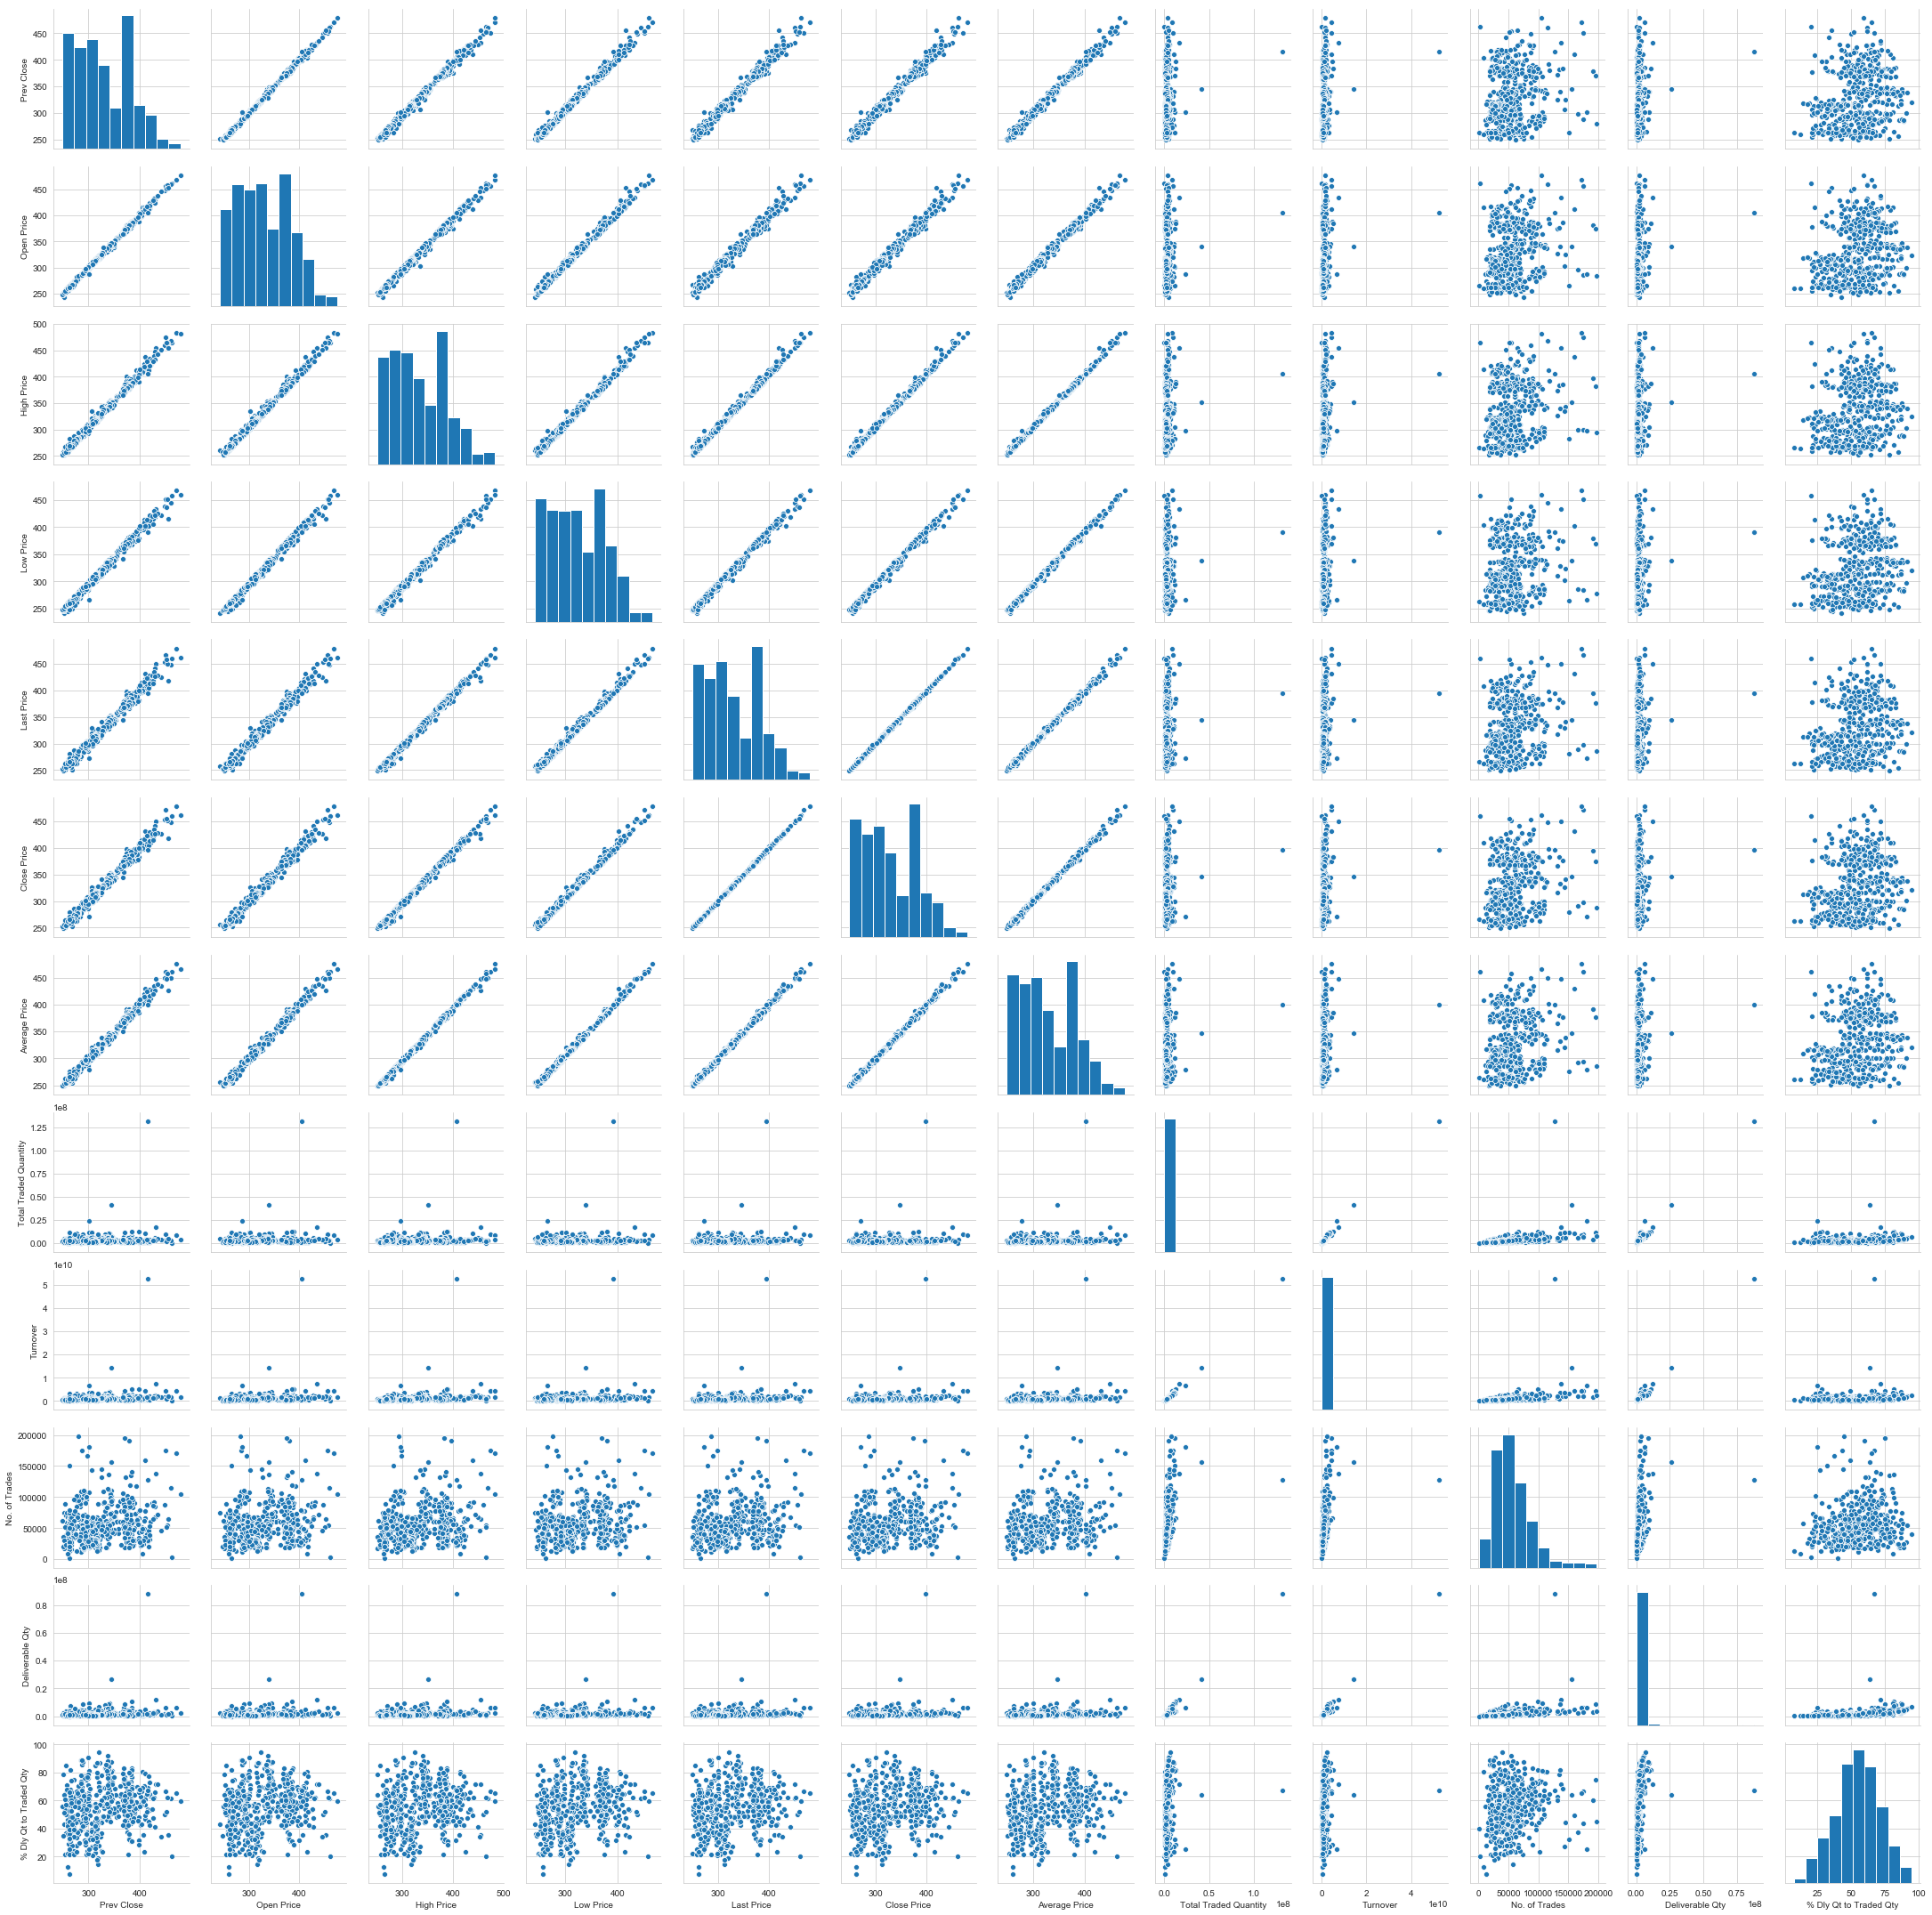

In [33]:
#Pair-plot of all the features(age,year,nodes,status)
plt.close();
sns.set_style("whitegrid")
sns.pairplot(data)
plt.show()

##### This pair plot shows that all the price features are highly correlated.

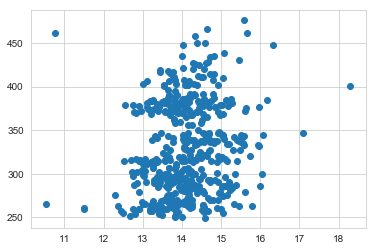

In [34]:
plt.scatter(np.log(data['Deliverable Qty']),data['Average Price'])
plt.show()

##### Now looking at the pair plot and the plot above, it can be said that 'Total Traded Quantity', 'Turnover' and 'Deliverable Quantity' features have very weak correlation with all features. Same with the remaining features.

### Selecting Last 90 Days Data

In [35]:
ninety_days_data=data.tail(90)

In [36]:
ninety_days_data.shape

(90, 15)

### Maximum, Minimum and Mean of Close Price of last 90 days data

In [37]:
ninety_days_data['Close Price'].max()

327.6

In [38]:
ninety_days_data['Close Price'].min()

259.0

In [39]:
ninety_days_data['Close Price'].mean()

296.9094444444444

In [40]:
data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

##### Date is in object type. We need to convert it to datetime64(ns)

In [41]:
data['Date'] =  pd.to_datetime(data['Date'])

In [42]:
data.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [43]:
print(data['Date'].max()-data['Date'].min())

728 days 00:00:00


##### Minimum and maximum dates when subtracted, they give the total number of days between them.

In [44]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [45]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [46]:
data['month_year'] = pd.to_datetime(data['Date']).dt.to_period('M')

In [47]:
data['price_volume']=pd.DataFrame(data['Close Price']*data['Total Traded Quantity'])

In [48]:
grouped_data=data.groupby(['month_year']).sum()

In [49]:
grouped_data

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,price_volume
month_year,,,,,,,,,,,,,,,
2017-05,4901.90,4905.30,4979.95,4813.55,4887.70,4893.80,4890.89,36120797,1.357589e+10,835063,21931121,708.52,26221,65,1.359207e+10
2017-06,7934.20,7949.20,8043.55,7856.65,7937.55,7942.15,7953.48,43328501,1.641771e+10,994494,22546278,1053.28,42357,126,1.638479e+10
2017-07,8586.20,8597.90,8721.55,8475.20,8607.30,8613.05,8597.70,48065263,1.964742e+10,869917,27014166,1199.40,42357,147,1.969313e+10
2017-08,8171.65,8172.00,8261.05,8049.35,8141.40,8145.45,8158.77,62289810,2.412198e+10,1160584,36312258,1297.40,42357,168,2.408851e+10
2017-09,7973.05,7991.10,8110.05,7891.15,7998.05,7996.25,8003.64,53649873,2.047053e+10,1297341,34277960,1281.51,42357,189,2.043142e+10
2017-10,8649.60,8671.65,8869.10,8504.35,8689.05,8693.35,8678.73,96787215,4.258239e+10,1627711,58027017,1130.40,40340,200,4.278251e+10
2017-11,8845.90,8874.40,8978.00,8685.90,8785.95,8787.45,8841.93,222470856,8.891354e+10,1928380,143994646,1273.90,44374,242,8.825031e+10
2017-12,7358.70,7362.45,7453.70,7265.80,7344.90,7353.75,7356.12,49892352,1.837013e+10,1214330,29246921,1140.35,40340,240,1.836365e+10
2018-01,7974.85,7974.30,8075.60,7855.40,7951.70,7947.65,7955.14,78227228,2.788889e+10,1629275,52692292,1402.02,44396,22,2.789580e+10


### Calculating VWAP Values for each month

In [50]:
grouped_data['vwap']=grouped_data['price_volume']/grouped_data['Total Traded Quantity']

In [51]:
vwap_values=grouped_data['vwap'].values.T.tolist()

In [52]:
len(vwap_values)

25

In [53]:
type(vwap_values)

list

In [54]:
print(vwap_values)

[376.2949421201864, 378.1526228590276, 409.7165275877093, 386.7166429589367, 380.828812861309, 442.026504376637, 396.6825574159701, 368.0655225333935, 356.5995856768694, 341.66457305945426, 335.78192939225096, 331.51379346683257, 314.537048693231, 293.97188118393956, 294.4168316506061, 286.5606359275498, 271.86763253470207, 263.1647870068575, 261.05080647408363, 257.3408322406076, 282.14692053761047, 309.5443630042272, 314.808695789326, 284.34368795227294, 268.84882297352993]


### Average Price and Profit-Loss

In [55]:
def avg_price(df,n):
    n_days_data=df.tail(n)
    return n_days_data['Close Price'].mean()

In [56]:
def profit_loss(df,n):
    n_days_data=df.tail(n)
    day_1=n_days_data['Close Price'].iloc[0]
    day_n=n_days_data['Close Price'].iloc[n-1]
    diff = day_n-day_1
    if diff>0:
        print("Profit : ",diff)
    else:
        print("Loss : ",diff)

## Averages:

### 1 WEEK

In [57]:
avg_price(data,7)

267.9071428571429

### 2 WEEKS

In [58]:
avg_price(data,14)

274.8178571428571

### 1 Month

In [59]:
avg_price(data,30)

295.91

### 3 Months

In [60]:
avg_price(data,30)

295.91

### 6 Months

In [61]:
avg_price(data,180)

281.5861111111109

### 1 Year

In [62]:
avg_price(data,365)

306.5973972602742

## Profit/Loss

### 1 WEEK

In [63]:
profit_loss(data,7)

Loss :  -8.550000000000011


### 2 WEEKS

In [64]:
profit_loss(data,14)

Loss :  -34.150000000000034


### 1 Month

In [65]:
profit_loss(data,30)

Loss :  -50.75


### 3 Months

In [66]:
profit_loss(data,90)

Profit :  6.449999999999989


### 6 Months

In [67]:
profit_loss(data,180)

Loss :  -18.44999999999999


### 1 Year

In [68]:
profit_loss(data,365)

Loss :  -114.69999999999999


## Daily Change in Percentages

In [69]:
data['Day_Perc_Change']=data['Close Price'].pct_change(fill_method='ffill')*100.0

In [70]:
data=data.fillna(0)

In [71]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,month_year,price_volume,Day_Perc_Change
0,INFRATEL,EQ,2017-05-15,374.70,375.80,375.80,368.65,372.00,371.05,371.08,761032,2.824044e+08,27740,357531,46.98,2017,5,2017-05,282380923.6,0.000000
1,INFRATEL,EQ,2017-05-16,371.05,371.15,380.85,370.05,375.75,376.55,377.05,1346372,5.076459e+08,42924,677288,50.30,2017,5,2017-05,506976376.6,1.482280
2,INFRATEL,EQ,2017-05-17,376.55,377.60,396.50,375.10,388.95,389.90,383.22,2268036,8.691629e+08,83975,1371275,60.46,2017,5,2017-05,884307236.4,3.545346
3,INFRATEL,EQ,2017-05-18,389.90,388.40,388.85,377.00,378.55,378.90,382.60,2014628,7.707910e+08,50270,1025637,50.91,2017,5,2017-05,763342549.2,-2.821236
4,INFRATEL,EQ,2017-05-19,378.90,381.10,387.50,374.85,379.40,378.95,379.43,2031322,7.707525e+08,63099,1020560,50.24,2017,5,2017-05,769769471.9,0.013196


## Trend Analysis

In [72]:
def trend(df):
    if df<=-7:
        return 'Bear drop'
    if df>-7 and df<=-3:
        return 'Among top losers'
    elif df>-3 and df<=-1:
        return 'Negative'
    elif df>-1 and df<=-0.5:
        return 'Slight Negative'
    elif df>-0.5 and df<=0.5:
        return 'Slight or No change'
    elif df>0.5 and df<=1:
        return 'Slight positive'
    elif df>1 and df<=3:
        return 'Positive'
    elif df>3 and df<=7:
        return 'Among top gainers'
    else:
        return 'Bull run'

In [73]:
data['Trend'] = [trend(x) for x in data['Day_Perc_Change']]

In [74]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,month_year,price_volume,Day_Perc_Change,Trend
0,INFRATEL,EQ,2017-05-15,374.70,375.80,375.80,368.65,372.00,371.05,371.08,...,2.824044e+08,27740,357531,46.98,2017,5,2017-05,282380923.6,0.000000,Slight or No change
1,INFRATEL,EQ,2017-05-16,371.05,371.15,380.85,370.05,375.75,376.55,377.05,...,5.076459e+08,42924,677288,50.30,2017,5,2017-05,506976376.6,1.482280,Positive
2,INFRATEL,EQ,2017-05-17,376.55,377.60,396.50,375.10,388.95,389.90,383.22,...,8.691629e+08,83975,1371275,60.46,2017,5,2017-05,884307236.4,3.545346,Among top gainers
3,INFRATEL,EQ,2017-05-18,389.90,388.40,388.85,377.00,378.55,378.90,382.60,...,7.707910e+08,50270,1025637,50.91,2017,5,2017-05,763342549.2,-2.821236,Negative
4,INFRATEL,EQ,2017-05-19,378.90,381.10,387.50,374.85,379.40,378.95,379.43,...,7.707525e+08,63099,1020560,50.24,2017,5,2017-05,769769471.9,0.013196,Slight or No change


## Mean of Total Traded Quantity for each Trend

In [75]:
trend_group=data.groupby('Trend').mean()

In [76]:
print(trend_group['Total Traded Quantity'])

Trend
Among top gainers      5.816889e+06
Among top losers       1.015391e+07
Bear drop              1.429408e+07
Negative               2.684517e+06
Positive               3.333011e+06
Slight Negative        2.884543e+06
Slight or No change    2.744105e+06
Slight positive        3.557961e+06
Name: Total Traded Quantity, dtype: float64


## Median of Total Traded Quantity for each Trend

In [77]:
trend_group=data.groupby('Trend').median()

In [78]:
print(trend_group['Total Traded Quantity'])

Trend
Among top gainers       4709712.5
Among top losers        3435092.5
Bear drop              14294085.0
Negative                2286066.5
Positive                2802185.0
Slight Negative         2317378.0
Slight or No change     2193471.5
Slight positive         2287491.5
Name: Total Traded Quantity, dtype: float64


In [79]:
data=data.drop('month',axis=1)

In [80]:
data=data.drop('year',axis=1)

In [81]:
data=data.drop('price_volume',axis=1)

In [82]:
data.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month_year,Day_Perc_Change,Trend
0,INFRATEL,EQ,2017-05-15,374.70,375.80,375.80,368.65,372.00,371.05,371.08,761032,2.824044e+08,27740,357531,46.98,2017-05,0.000000,Slight or No change
1,INFRATEL,EQ,2017-05-16,371.05,371.15,380.85,370.05,375.75,376.55,377.05,1346372,5.076459e+08,42924,677288,50.30,2017-05,1.482280,Positive
2,INFRATEL,EQ,2017-05-17,376.55,377.60,396.50,375.10,388.95,389.90,383.22,2268036,8.691629e+08,83975,1371275,60.46,2017-05,3.545346,Among top gainers
3,INFRATEL,EQ,2017-05-18,389.90,388.40,388.85,377.00,378.55,378.90,382.60,2014628,7.707910e+08,50270,1025637,50.91,2017-05,-2.821236,Negative
4,INFRATEL,EQ,2017-05-19,378.90,381.10,387.50,374.85,379.40,378.95,379.43,2031322,7.707525e+08,63099,1020560,50.24,2017-05,0.013196,Slight or No change
5,INFRATEL,EQ,2017-05-22,378.95,383.70,389.30,376.15,388.20,387.95,385.56,2772691,1.069052e+09,73071,1228540,44.31,2017-05,2.374984,Positive
6,INFRATEL,EQ,2017-05-23,387.95,385.00,390.00,378.40,379.90,379.85,382.84,3811223,1.459071e+09,60957,2039492,53.51,2017-05,-2.087898,Negative
7,INFRATEL,EQ,2017-05-24,379.85,379.85,382.00,367.20,368.45,369.00,372.49,3134390,1.167521e+09,83856,1860115,59.35,2017-05,-2.856391,Negative
8,INFRATEL,EQ,2017-05-25,369.00,369.10,376.35,365.85,368.70,373.50,371.80,7287977,2.709680e+09,89929,6053646,83.06,2017-05,1.219512,Positive
9,INFRATEL,EQ,2017-05-26,373.50,370.00,377.20,366.30,369.50,369.95,371.45,1918463,7.126107e+08,43541,788763,41.11,2017-05,-0.950469,Slight Negative


In [83]:
data.to_csv('week2.csv', sep=',')